# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 07/15/2022
* Student Name: Neil Antrassian
* Student Net ID: mst8gd
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL: 

# The Monte Carlo Module

In [14]:
import pandas as pd
import numpy as np
import unittest

class Die:
    def __init__(self, faces_array):
        '''
    PURPOSE: initialize die objects
    
    INPUTS
    faces_array   a list of strings or ints
    
    OUTPUT
    no return value
    attributes include faces_array, weights, weight_face
    
        '''
        
        self.faces_array = faces_array
        if not isinstance(self.faces_array[0], (int, str)):
            raise TypeError("Only integers or string are allowed")
        else:
            self.weights = np.ones(len(faces_array))
            self.weight_face = pd.DataFrame({'face' : faces_array, 'weights' : self.weights})
            self.weight_face.index +=1
    def change_weight(self, face_value, new_weight):
        '''
    PURPOSE: change the weight of a die face
    
    INPUTS
    face_value    which face to change
    new_weight  new weight to change to
    
    OUTPUT
    
        '''
        self.face_value = face_value
        self.new_weight = new_weight
        if self.face_value not in self.faces_array:
            raise ValueError("Only values in faces array can have their weights changed")
        else:
            self.weights[face_value] = new_weight
            self.weight_face['weights'] = self.weights
            
    def roll_die(self, num_roll = 1):
        '''
    PURPOSE: roll the die n times
    
    INPUTS
    num_rolls    number of times to roll die, default =1 
    
    OUTPUT
    list of faces from the rolls
        '''
        if not isinstance(num_roll, int):
            raise TypeError("Only integers are allowed")
        else:
            df = self.weight_face.sample(num_roll, replace =True, weights = 'weights')
            return df['face'].tolist()
    def current_die(self):
        '''
    PURPOSE: return current die
    
    INPUTS

    
    OUTPUT
    weight_face    df of current weights and faces
        '''
        return self.weight_face
    
class Game:
    '''
    PURPOSE: create game objects from a list of dice
    
    INPUTS
    die_list    list of die objects
    
    OUTPUT

    '''
    def __init__(self, die_list):
        '''
    PURPOSE: create game objects from a list of dice
    
    INPUTS
    die_list    list of die objects
    
    OUTPUT
    no return
    attributes include die_list

        '''
        
        self.die_list = die_list
        if not isinstance(self.die_list[0], (Die)):
            raise TypeError("Only die objects are allowed")
        else:
            self.die_list = die_list                       
                       
    def play(self, num_rolls):
        '''
    PURPOSE: rolls each die in die_list num_rolls times
    
    INPUTS
    num_rolls   number of times to roll the dice
    
    OUTPUT
        '''      
        
        self.num_rolls = num_rolls
        self.dice_rolls = [i.roll_die(self.num_rolls) for i in self.die_list]
        self.__play_df = pd.DataFrame(self.dice_rolls)
        self.__play_df.index +=1
        self.__play_df.columns +=1
        return None
    def show_play(self, wide = True):
        '''
    PURPOSE: show df of most recent play
    
    INPUTS
    wide    boolean for which rep of df to return (wide or narrow)
    
    OUTPUT
    df of most recent play
        '''
        self.wide = wide
        if self.wide == False:
            return self.__play_df.T.stack().to_frame()   
        else:
            return self.__play_df
        
class Analyzer:
    '''
    PURPOSE: analyze the game object
    
    INPUTS
    game_object
    
    OUTPUT
    '''
    combo = pd.DataFrame([])
    def __init__(self, game_object):
        '''
    PURPOSE: initialize the game object
    
    INPUTS
    game_object
    
    OUTPUT
    no return
    attributes include game_object
    '''
        
        self.game_object = game_object

    def jackpot(self):
        '''
    PURPOSE: return num timmes that a roll returns the same face for every die
    
    INPUTS
    
    OUTPUT
    count    int for numm timmes jackpot occurs 
        '''
        df = self.game_object.show_play().T
        a = df.values
        b = (a == a[:, [0]]).all(axis=1)
        count = np.count_nonzero(b)
        return count
    def combo(self):
        '''
    PURPOSE: returns the different combos of die faces and the frequency they appeared
    
    INPUTS
    
    OUTPUT
    combo    die combo frequencies
    '''
        self._result = self.game_object.show_play().T
        self.combo = self._result.apply(lambda x: pd.Series(sorted(x)), 1).value_counts().to_frame('n')
        return self.combo
    
    def face_counts(self):
        '''
    PURPOSE: roll the die n times
    
    INPUTS
    num_rolls    number of times to roll die, default =1 
    
    OUTPUT
    list of faces from the rolls
    '''
        self._result = self.game_object.show_play().T
        self.face_counts = self._result.apply(pd.Series.value_counts, axis=1).fillna(0)
        return self.face_counts.astype(int)
                    

# Test Module

In [18]:
class MonteCarloTestSuite(unittest.TestCase):
    def test_1_current_die(self):
        # create a die object
        instance = Die([1,2,3])
        #get current die into dict form
        test_die_dict = instance.current_die().to_dict()
        make_dict = {'face' : {1:1, 2:2, 3:3}, 'weights' :{1: 1.0, 2:1.0, 3: 1.0}}
        message = "assert current die is correct"
        self.assertEqual(test_die_dict, make_dict)
   
    def test_2_change_die_weight(self): 
        # create a die object
        instance = Die([1,2,3])
        # change die weight
        instance.change_weight(2, 200)
        #get current die into dict form
        test_die_dict = instance.current_die().to_dict()
        make_dict = {'face' : {1:1, 2:2, 3:3}, 'weights' :{1: 1.0, 2:1.0, 3: 200.0}}
        message = "assert dict equals change_die method's new weights"
        self.assertEqual(test_die_dict, make_dict)
    
    def test_3_roll_die(self): 
        # create a die object
        instance = Die([1,2,3])
        roll_count = len(instance.roll_die(4))
        #roll die 4 times, make sure it rolled four times
        test_die_roll = 4
        message = "assert rolled four times"
        self.assertEqual(test_die_roll, roll_count)
    
    def test_4_play_shape_wide(self):
        b = Die([1,2])
        c = Die([1,2])
        e = Die([1,2])
        dice = Game([b,c,e])
        dice.play(2)
        play_shape = np.shape(dice.show_play(wide = True))
        test_shape = (3, 2)
        message = "assert wide works"
        self.assertEqual(play_shape, test_shape)
    
    def test_5_play_shape_narrow(self):
        b = Die([1,2])
        c = Die([1,2])
        e = Die([1,2])
        dice = Game([b,c,e])
        dice.play(2)
        play_shape = np.shape(dice.show_play(wide = False))
        test_shape = (6, 1)
        message = "assert wide works"
        self.assertEqual(play_shape, test_shape)
        
    def test_6_jackpot(self):
        b = Die([1])
        c = Die([1])
        e = Die([1])
        dice = Game([b,c,e])
        dice.play(500)
        azr = Analyzer(dice)
        jack_num = azr.jackpot()
        test_num = 500
        message = "assert jackpot for 1 sided die returns number of plays"
        self.assertEqual(test_num, jack_num)

    def test_7_typing_for_die(self):
        message = "assert exception is raised since type is wrong"
        with self.assertRaises(Exception):
            d = Die([1.0,2.0,3.0])
            
    def test_8_value_of_change_weight(self):
        message = "assert exception is raised since value passed is not in faces_array"
        with self.assertRaises(Exception):
            b = Die([1,2,3,4,5,6])
            b.change_weight(8, 200)
            
    def test_9_typing_for_roll_die(self):
        message = "assert exception is raised since type is wrong"
        with self.assertRaises(Exception):
            d = Die([1,2,3])
            d.roll_die(7.5)
            
            
    def test_10_typing_for_game(self):
        message = "assert exception is raised since 7 isn't a die object"
        with self.assertRaises(Exception):
            b = Die([1,2,3]) 
            c = Die([1,2,3])
            dice = Game([7, b, c])

# Test Results

test_10_typing_for_game (__main__.MonteCarloTestSuite) ... ok
test_1_current_die (__main__.MonteCarloTestSuite) ... ok
test_2_change_die_weight (__main__.MonteCarloTestSuite) ... ok
test_3_roll_die (__main__.MonteCarloTestSuite) ... ok
test_4_play_shape_wide (__main__.MonteCarloTestSuite) ... ok
test_5_play_shape_narrow (__main__.MonteCarloTestSuite) ... ok
test_6_jackpot (__main__.MonteCarloTestSuite) ... ok
test_7_typing_for_die (__main__.MonteCarloTestSuite) ... ok
test_8_value_of_change_weight (__main__.MonteCarloTestSuite) ... ok
test_9_typing_for_roll_die (__main__.MonteCarloTestSuite) ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.021s

OK


# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

In [ ]:
import pandas as pd
import numpy as np
from montecarlo import Die, Game, Analyzer

## Scenario 1

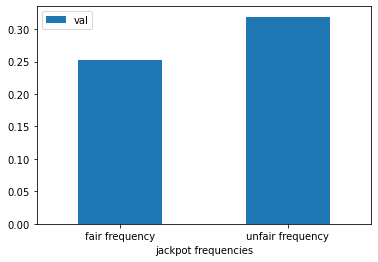

In [19]:
fair = Die([1,2])
unfair = Die([1,2])
unfair.change_weight(1, 5)
fair_coins = Game([fair, fair, fair])
unfair_coins = Game([unfair, unfair, fair])

fair_coins.play(1000)
unfair_coins.play(1000)

analyze_fair = Analyzer(fair_coins)
analyze_unfair = Analyzer(unfair_coins)

jack_fair = analyze_fair.jackpot() / 1000
jack_unfair = analyze_unfair.jackpot() / 1000
freq_df = pd.DataFrame({'jackpot frequencies': ['fair frequency','unfair frequency'],'val': [jack_fair, jack_unfair]})

ax = freq_df.plot.bar(x = 'jackpot frequencies', y = 'val', rot = 0)

## Scenario 2

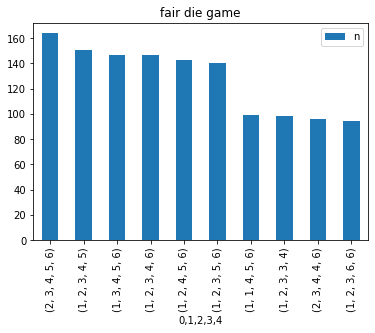

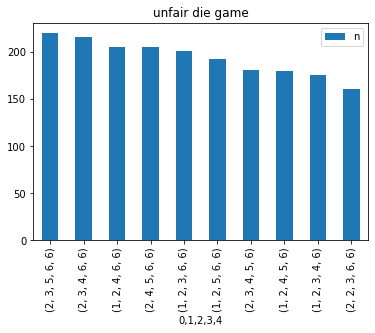

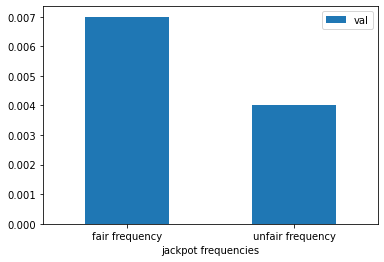

In [22]:
fair_die = Die([1,2,3,4,5,6])
unfair_die_1 = Die([1,2,3,4,5,6])
unfair_die_2 = Die([1,2,3,4,5,6])
unfair_die_1.change_weight(5, 5)
unfair_die_2.change_weight(1, 5)
fair_game = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
unfair_game = Game([unfair_die_1, unfair_die_1, unfair_die_2, fair_die, fair_die])
fair_game.play(10000)
unfair_game.play(10000)
analyze_fair_die = Analyzer(fair_game)
analyze_unfair_die = Analyzer(unfair_game)

jack_fair_die = analyze_fair_die.jackpot() / 1000
jack_unfair_die = analyze_unfair_die.jackpot() / 1000
freq_die_df = pd.DataFrame({'jackpot frequencies': ['fair frequency','unfair frequency'],'val': [jack_fair_die, jack_unfair_die]})

fair1 = analyze_fair_die.combo().head(10)
unfair1 =analyze_unfair_die.combo().head(10)

plot1 = fair1.plot.bar(y = 'n', use_index = True, title = 'fair die game')
plot2 = unfair1.plot.bar(y = 'n', use_index = True, title = 'unfair die game')
ax2 = freq_die_df.plot.bar(x = 'jackpot frequencies', y = 'val', rot = 0)

## Scenario 3

In [23]:
alphabet = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z')
alpha_weights = [8.4966,2.0720,4.5388,3.3844,11.1607
,1.8121,2.4705,3.0034,7.5448,0.1965,1.1016,5.4893
,3.0129,6.6544,7.1635,3.1671,0.1962,7.5809,5.7351,6.9509
,3.6308,1.0074,1.2899,0.2902,1.7779,0.2722]
alpha1 = Die(alphabet)
alpha1.weight_face['weights'] = alpha_weights
alpha2 = Die(alphabet)
alpha2.weight_face['weights'] = alpha_weights
alpha3= Die(alphabet)
alpha3.weight_face['weights'] = alpha_weights
alpha4 = Die(alphabet)
alpha4.weight_face['weights'] = alpha_weights
alpha5 = Die(alphabet)
alpha5.weight_face['weights'] = alpha_weights

dice = Game([alpha1, alpha2, alpha3, alpha4, alpha5])
dice.play(1000)
dice.show_play()

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
1,E,R,O,M,P,A,I,L,E,D,...,U,T,T,R,E,B,N,N,R,O
2,P,O,O,L,E,E,T,C,R,Y,...,P,U,C,O,E,N,A,A,E,S
3,C,R,M,E,U,F,E,H,C,O,...,A,O,I,P,T,U,A,I,D,N
4,E,G,G,I,R,O,S,B,A,O,...,I,Z,F,P,D,B,R,I,G,N
5,N,T,E,S,K,G,I,C,T,C,...,T,D,G,I,D,R,T,C,L,G


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [24]:
!ls -lRF -o

total 24
-rw-r--r--   1 neilantrassian  1071 Jul 15 09:38 LICENSE
drwxr-xr-x  11 neilantrassian   352 Jul 15 16:48 Project/
-rw-r--r--   1 neilantrassian  3633 Jul 15 11:08 README.md
drwxr-xr-x   3 neilantrassian    96 Jul 15 16:45 __pycache__/
-rw-r--r--   1 neilantrassian   306 Jul 15 09:43 setup.py

./Project:
total 280
-rw-r--r--  1 neilantrassian  63450 Jul 15 16:48 FinalProjectSubmissionTemplate.ipynb
-rw-r--r--@ 1 neilantrassian    705 Jul 15 09:47 MonteTestResults.txt
-rw-r--r--  1 neilantrassian  51430 Jul 15 09:59 Scenarios.ipynb
-rw-r--r--  1 neilantrassian     31 Jul 15 09:59 __init__.py
drwxr-xr-x  3 neilantrassian     96 Jul 15 10:55 __pycache__/
-rw-r--r--  1 neilantrassian   4990 Jul 15 10:55 montecarlo.py
-rw-r--r--  1 neilantrassian   1801 Jul 14 19:45 montecarlo.pyc
-rw-r--r--  1 neilantrassian   3394 Jul 15 10:36 testing_project.py

./Project/__pycache__:
total 16
-rw-r--r--  1 neilantrassian  5688 Jul 15 10:55 montecarlo.cpython-39.pyc

./__pycache__:
total 16
-rw-

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [ ]:
# Installation commands

In [25]:
!pip install -e .

Obtaining file:///Users/neilantrassian/Desktop/MSDS/DS5001/DS5100-2022-06-RA/MonteCarlo
  Running setup.py develop for MonteCarloProject
